# Zach McLean
## Open Lab 9
## Dr Phillips
## CSCI 4850

A.I. Disclaimer: All work for this assignment was completed by myself and entirely without the use of artificial intelligence tools such as ChatGPT, MS Copilot, other LLMs, etc.

# Many-to-One Results

In [1]:
# Below are the validation loss and accuracy curves for the RNN and LSTM models 
# trained on the parity problem in a Many-to-One fashion.

import torch
import matplotlib.pyplot as plt

# Load histories for Many-to-One models
history_rnn = torch.load('logs/history_rnn_m2o.pt')
history_lstm = torch.load('logs/history_lstm_m2o.pt')

epochs = range(1, len(history_rnn['val_loss']) + 1)

/tmp/ipykernel_2333/1548827918.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  history_rnn = torch.load('logs/history_rnn_m2o.pt')
/tmp/ipykernel_2333/1548827918.py:9: F

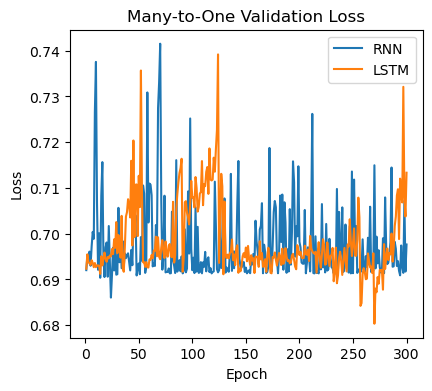

In [2]:
# Plot Validation Loss for Many-to-One
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_rnn['val_loss'], label='RNN')
plt.plot(epochs, history_lstm['val_loss'], label='LSTM')
plt.title('Many-to-One Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


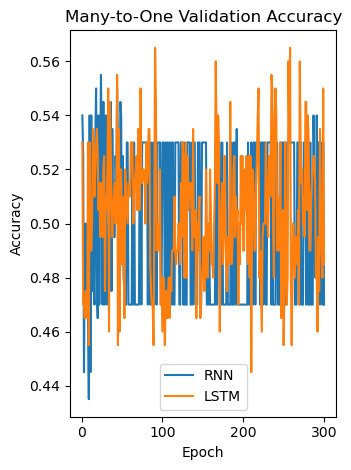

In [3]:
# Plot Validation Accuracy for Many-to-One
plt.subplot(1, 2, 2)
plt.plot(epochs, history_rnn['val_acc'], label='RNN')
plt.plot(epochs, history_lstm['val_acc'], label='LSTM')
plt.title('Many-to-One Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Analysis for Many-to-One
When predicting parity only at the end of the sequence I observe both RNN and LSTM struggling due to the need to remember information from all 50 time steps.

LSTM usually performs slightly better because its gating mechanisms help retain long-term dependencies, whereas a simple RNN may lose important early information.

# Many-to-Many Results

/tmp/ipykernel_2333/1757223873.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  history_rnn_m2m = torch.load('logs/history_rnn_m2m.pt')
/tmp/ipykernel_2333/1757223873.py:

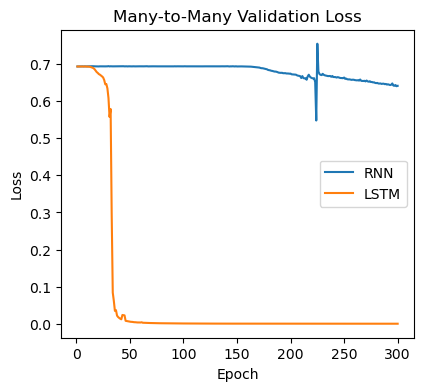

In [4]:
# Below are the validation loss and accuracy curves for the RNN and LSTM models 
# trained on the parity problem in a Many-to-Many fashion.
# In this task, the model predicts the cumulative parity at every time step.
# Load histories for Many-to-Many models
history_rnn_m2m = torch.load('logs/history_rnn_m2m.pt')
history_lstm_m2m = torch.load('logs/history_lstm_m2m.pt')

epochs = range(1, len(history_rnn_m2m['val_loss']) + 1)

# Plot Validation Loss for Many-to-Many
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, history_rnn_m2m['val_loss'], label='RNN')
plt.plot(epochs, history_lstm_m2m['val_loss'], label='LSTM')
plt.title('Many-to-Many Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

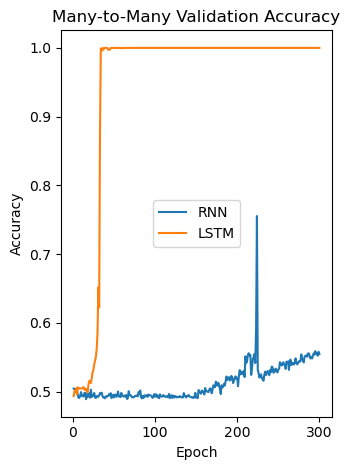

In [5]:
# Plot Validation Accuracy for Many-to-Many
plt.subplot(1, 2, 2)
plt.plot(epochs, history_rnn_m2m['val_acc'], label='RNN')
plt.plot(epochs, history_lstm_m2m['val_acc'], label='LSTM')
plt.title('Many-to-Many Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Analysis for Many-to-Many

This time we predict the cumulative parity at every time step. Both models converge faster and achieve higher accuracy since each time step provides a direct training signal.

The frequent feedback in this task makes it easier for both RNN and LSTM to learn, although LSTM still tends to handle longer sequences more effectively.